In [0]:
#import io
import os
import numpy as np
from zipfile import ZipFile
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16

In [0]:
print('total training cat images:', len(os.listdir('/content/drive/My Drive/cats_and_dogs_small/train/cats'
)))

total training cat images: 1000


In [0]:
train_dir = '/content/drive/My Drive/cats_and_dogs_small/train'
validation_dir = '/content/drive/My Drive/cats_and_dogs_small/validation'
test_dir = '/content/drive/My Drive/cats_and_dogs_small/test'

train_cats_dir = '/content/drive/My Drive/cats_and_dogs_small/train/cats'

# **Model 1**: Base model

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6909 - acc: 0.5400 - val_loss: 0.6785 - val_acc: 0.5170
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6595 - acc: 0.6065 - val_loss: 0.6416 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6216 - acc: 0.6640 - val_loss: 0.6279 - val_acc: 0.6480
Epoch 4/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5731 - acc: 0.7125 - val_loss: 0.6014 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5364 - acc: 0.7290 - val_loss: 0.5850 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5079 - acc: 0.7525 - val_loss: 0.5643 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.4816 - acc: 0.7635 - val_loss: 0.5949 - val_acc: 

In [0]:
model.save('cats_and_dogs_small_1.h5')

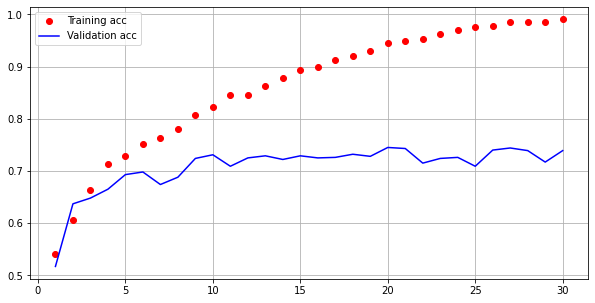

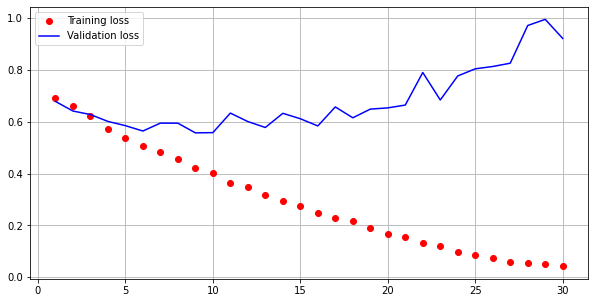

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'ro',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.grid(True)
plt.legend()
plt.show()

Conclusion: The model overfits

# **Model 2**: Use data agumentation

First, an example

In [0]:
## the original image
from tensorflow.keras.preprocessing import image

train_cats_dir = '/content/drive/My Drive/cats_and_dogs_small/train/cats'
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
img

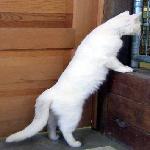

In [0]:
img

In [0]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

In [0]:
datagen_test = ImageDataGenerator(
    rotation_range= 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

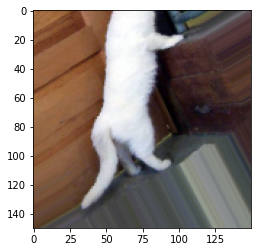

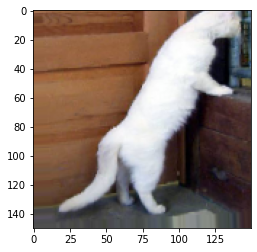

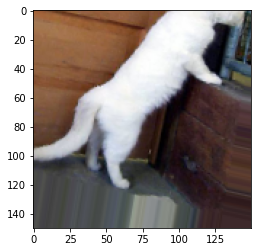

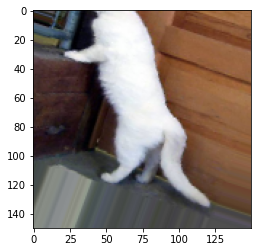

In [0]:
## a set of data augmented images

i = 0
for batch in datagen_test.flow(x,batch_size=1):
  plt.figure(i)
  imgplot =plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

To further reduce overfitting, we'll also use dropout layers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) ## new dropout
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

We put our datasets through data augmentation

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/100
100/100 [==============================] - 27s 268ms/step - loss: 0.6050 - acc: 0.6654 - val_loss: 0.6111 - val_acc: 0.6567
Epoch 2/100
100/100 [==============================] - 27s 265ms/step - loss: 0.6030 - acc: 0.6682 - val_loss: 0.6175 - val_acc: 0.6559
Epoch 3/100
100/100 [==============================] - 27s 268ms/step - loss: 0.5929 - acc: 0.6822 - val_loss: 0.5511 - val_acc: 0.7133
Epoch 4/100
100/100 [==============================] - 28s 276ms/step - loss: 0.5874 - acc: 0.6815 - val_loss: 0.5517 - val_acc: 0.7018
Epoch 5/100
100/100 [==============================] - 28s 279ms/step - loss: 0.5764 - acc: 0.7045 - val_loss: 0.5701 - val_acc: 0.6939
Epoch 6/100
100/100 [==============================] - 27s 274ms/step - loss: 0.5640 - acc: 0.7045 - val_loss: 0.5857 - val_acc: 0.6973
Epoch 7/100
100/100 [==============================] - 27s 270ms/step - loss: 0.5658 - acc: 0.7107 - val_loss: 0.5807 - val_acc: 0.7113
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_2.h5')

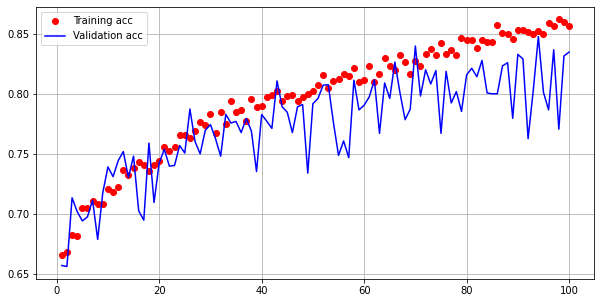

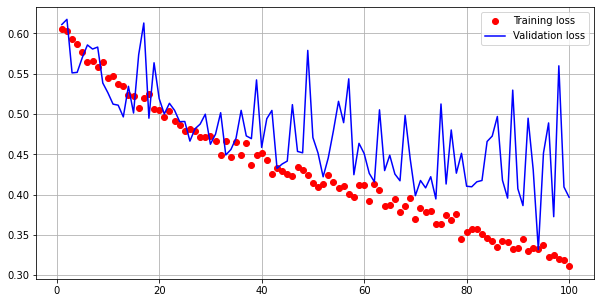

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'ro',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.grid(True)
plt.legend()
plt.show()

The model performs better.

# **Model 3:** Using VGG16 as a convolutiional base.

In [0]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58892288/58889256 [==============================] - 3s 0us/step


In [0]:
# this is the convolutional base of VBB16
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# **Model 3A:** Fast feature extraction without augmentation

In [0]:
print(train_dir,validation_dir)

/content/cats_and_dogs_small/train /content/cats_and_dogs_small/validation


In [0]:
test_dir = '/content/drive/My Drive/cats_and_dogs_small/test'

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [0]:
# we define this function to extract features using VGG16 from our datagenerated images

def extract_features(directory,sample_count):
  features = np.zeros(shape = (sample_count,4,4,512))
  labels = np.zeros(shape = (sample_count))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          class_mode = 'binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1) * batch_size] = features_batch
    labels[i * batch_size : (i+1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [0]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features.shape

(2000, 4, 4, 512)

Since we are feeding these to a densely conected calssifier, we must flatten them:

In [0]:
train_features = np.reshape(train_features,(2000,4 * 4 * 512))
validation_features = np.reshape(validation_features,(1000,4 * 4 * 512))
test_features = np.reshape(test_features,(1000,4 * 4 * 512))

We now define the densely conected classifier part of our NN

In [0]:
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr = 2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [0]:
history = model.fit(train_features,train_labels,
                    epochs = 30,
                    batch_size=20,
                    validation_data = (validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.5959 - acc: 0.6805 - val_loss: 0.4404 - val_acc: 0.8330
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4194 - acc: 0.8270 - val_loss: 0.3643 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3610 - acc: 0.8385 - val_loss: 0.3230 - val_acc: 0.8830
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3149 - acc: 0.8740 - val_loss: 0.3000 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2901 - acc: 0.8810 - val_loss: 0.2847 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2670 - acc: 0.8895 - val_loss: 0.2749 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2494 - acc: 0.9030 - val_loss: 0.2692 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

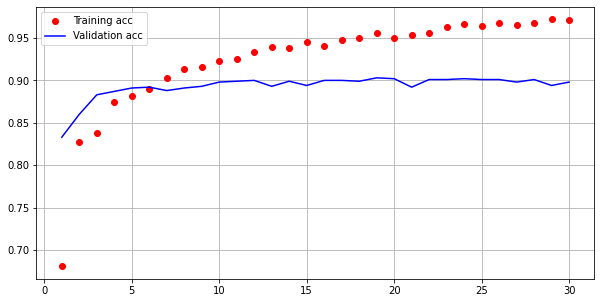

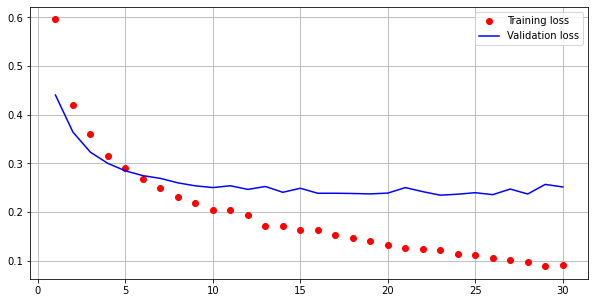

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'ro',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.grid(True)
plt.legend()
plt.show()

Conclusion: We are overfitting. We need data augmentation

# **Model 3B:** We use data augmentation

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


We freeze the trainable weights in the convolutional base (we don't want their learned representations to be altered)

In [0]:
len(model.trainable_weights)

4

In [0]:
conv_base.trainable = False

In [0]:
len(model.trainable_weights)

4

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')


Found 2000 images belonging to 2 classes.


In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer=optimizers.RMSprop(lr = 2e-5),
              metrics = ['acc'])

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 26s 257ms/step - loss: 0.5681 - acc: 0.7115 - val_loss: 0.4181 - val_acc: 0.8458
Epoch 2/30
100/100 [==============================] - 24s 240ms/step - loss: 0.4667 - acc: 0.7940 - val_loss: 0.3532 - val_acc: 0.8628
Epoch 3/30
100/100 [==============================] - 24s 238ms/step - loss: 0.4156 - acc: 0.8200 - val_loss: 0.3153 - val_acc: 0.8634
Epoch 4/30
100/100 [==============================] - 24s 238ms/step - loss: 0.3982 - acc: 0.8260 - val_loss: 0.2948 - val_acc: 0.8858
Epoch 5/30
100/100 [==============================] - 24s 238ms/step - loss: 0.3743 - acc: 0.8385 - val_loss: 0.2848 - val_acc: 0.8892
Epoch 6/30
100/100 [==============================] - 24s 240ms/step - loss: 0.3580 - acc: 0.8410 - val_loss: 0.2890 - val_acc: 0.8788
Epoch 7/30
100/100 [==============================] - 23s 231ms/step - loss: 0.3536 - acc: 0.8485 - val_loss: 0.2783 - val_acc: 0.8892
Epoch 8/30
100/100 [==============================] - 2

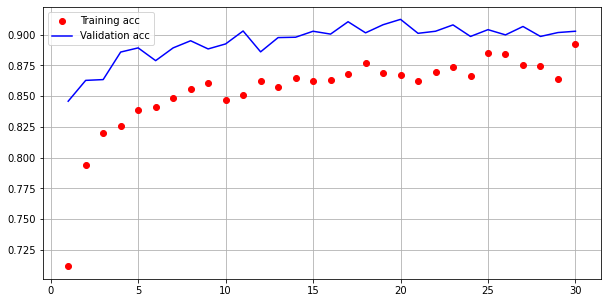

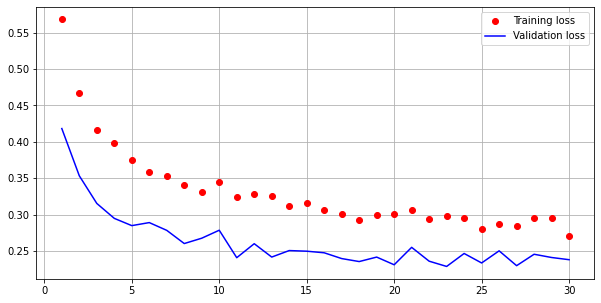

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'ro',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.grid(True)
plt.legend()
plt.show()

Overfit is now gone

In [0]:
model.save('cats_and_dogs_small_3.h5')

# **Model 4:** Fine tuning

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We unfreeze the convolutional base

In [0]:
conv_base.trainable = True

We train the top 3 layers

In [0]:
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer=optimizers.RMSprop(lr = 1e-5), ## very slow learning rate, so as to not change too much the layers
              metrics = ['acc'])

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs = 100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 24s 235ms/step - loss: 0.3276 - acc: 0.8665 - val_loss: 0.2182 - val_acc: 0.9150
Epoch 2/100
100/100 [==============================] - 24s 236ms/step - loss: 0.2749 - acc: 0.8780 - val_loss: 0.2017 - val_acc: 0.9182
Epoch 3/100
100/100 [==============================] - 24s 237ms/step - loss: 0.2621 - acc: 0.8905 - val_loss: 0.2123 - val_acc: 0.9150
Epoch 4/100
100/100 [==============================] - 24s 239ms/step - loss: 0.2482 - acc: 0.8965 - val_loss: 0.1973 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 24s 240ms/step - loss: 0.2380 - acc: 0.9065 - val_loss: 0.2117 - val_acc: 0.9150
Epoch 6/100
100/100 [==============================] - 24s 239ms/step - loss: 0.2126 - acc: 0.9110 - val_loss: 0.1884 - val_acc: 0.9253
Epoch 7/100
100/100 [==============================] - 24s 240ms/step - loss: 0.2177 - acc: 0.9115 - val_loss: 0.2530 - val_acc: 0.9008
Epoch 8/100
100/100 [===========================

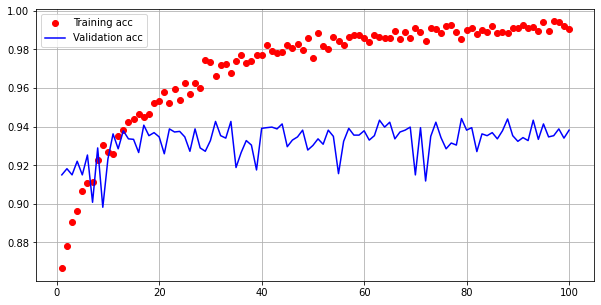

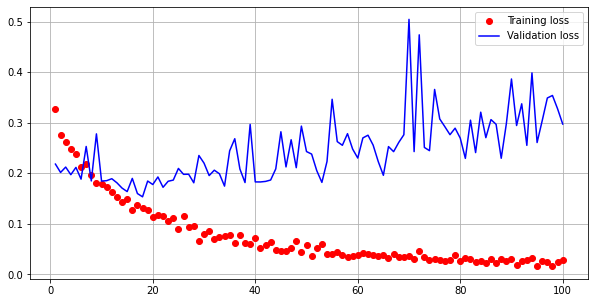

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'ro',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.grid(True)
plt.legend()
plt.show()

The plot is noisy. We take the exponential moving average 

In [0]:
def smoot_curve(points, factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor) )
    else:
      smoothed_points.append(point)
  return smoothed_points

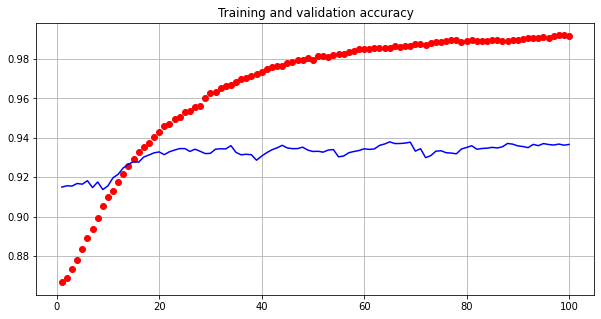

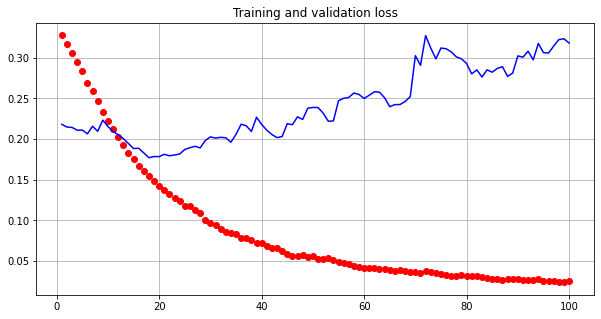

In [0]:
plt.figure(figsize=(10,5))
plt.plot(epochs, smoot_curve(acc),'ro',label = 'Smoothed training acc')
plt.plot(epochs, smoot_curve(val_acc),'b',label = 'Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(epochs, smoot_curve(loss),'ro',label = 'Smoothed training loss')
plt.plot(epochs, smoot_curve(val_loss),'b',label = 'Smoothed validation loss')
plt.title('Training and validation loss')
plt.grid(True)
plt.show()

**FINAL** **ESTIMATION:** We apply the test data to our model

In [0]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
test_loss, test_acc = model.evaluate_generator(test_generator,steps = 50)
print('test accuracy: ',test_acc)

test accuracy:  0.9430000185966492


In [0]:
model.save('cats_and_dogs_small_4.h5')



# **Visualizing Covnet Activations**

We use our Model 2 to visualize its activations in its convolutional base

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Example: We use a single image to visualize the different features in its activation after the first convolutional layer

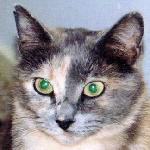

In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_path = '/content/drive/My Drive/cats_and_dogs_small/test/cats/cat.1700.jpg'
img = image.load_img(img_path, target_size=(150,150))
img

In [0]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255

In [0]:
print(img_tensor.shape)

(1, 150, 150, 3)


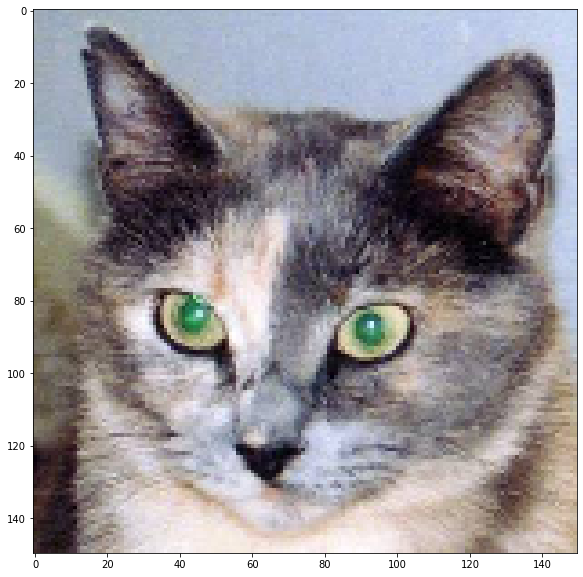

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(img_tensor[0])
plt.show()

In [0]:
from tensorflow.keras import models

In [0]:
model.layers[0].output

<tf.Tensor 'conv2d/Identity:0' shape=(None, 148, 148, 32) dtype=float32>

In [0]:
layer_outputs  = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input,outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0] ## activation of the 1st conv

In [0]:
print(first_layer_activation.shape)

(1, 148, 148, 32)


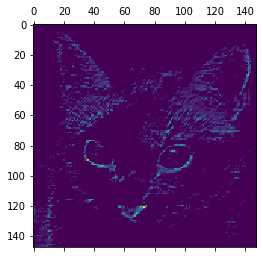

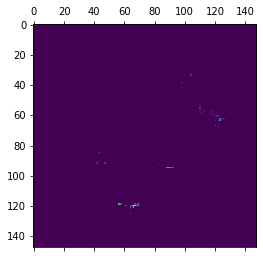

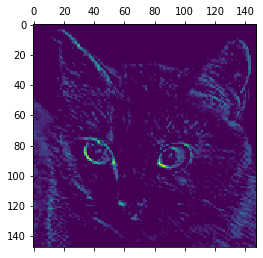

In [0]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap = 'viridis')
plt.show()
plt.matshow(first_layer_activation[0, :, :, 10], cmap = 'viridis')
plt.show()
plt.matshow(first_layer_activation[0, :, :, 21], cmap = 'viridis')
plt.show()

We now visualize all the features in all the activations on the convolutional base

In [0]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

In [0]:
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3']

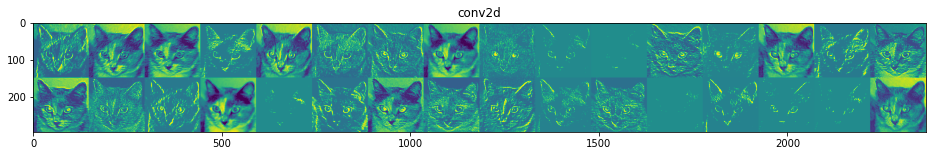

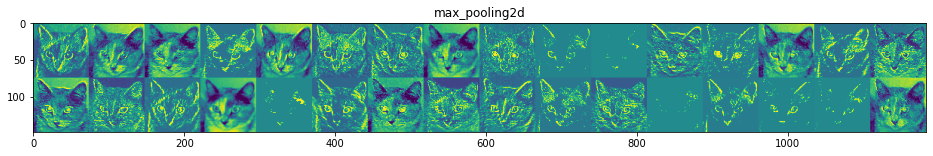

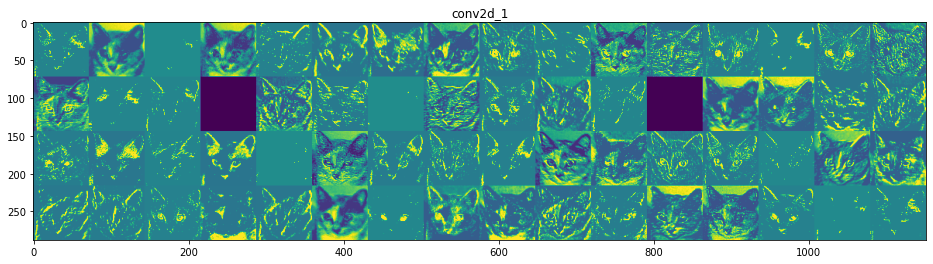

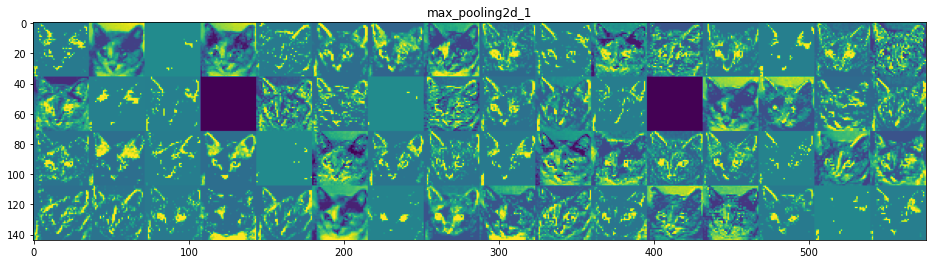

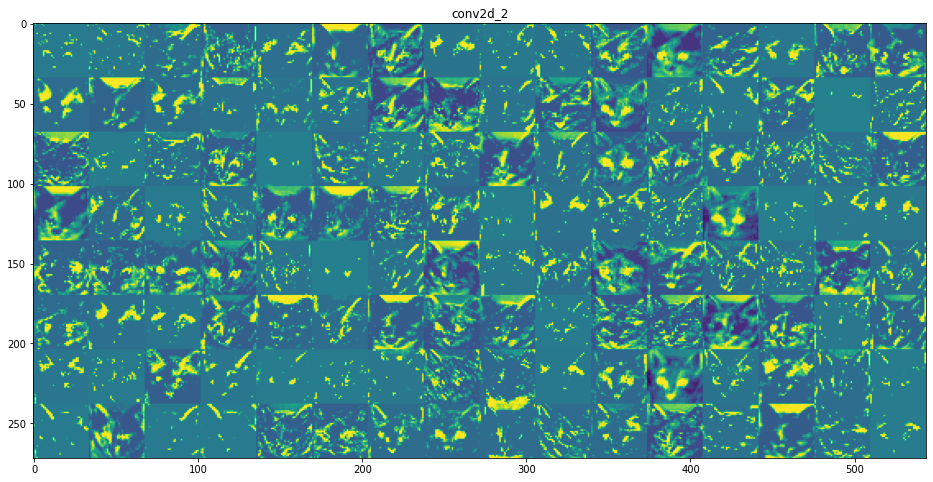

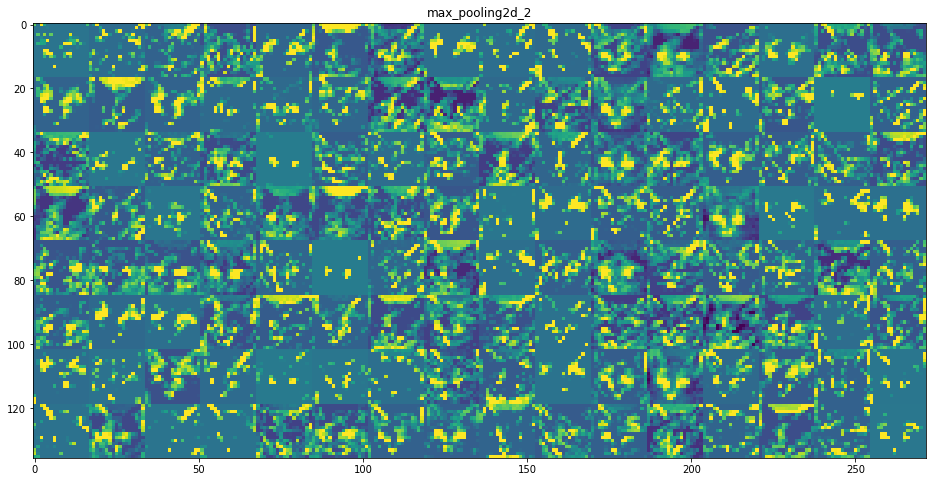

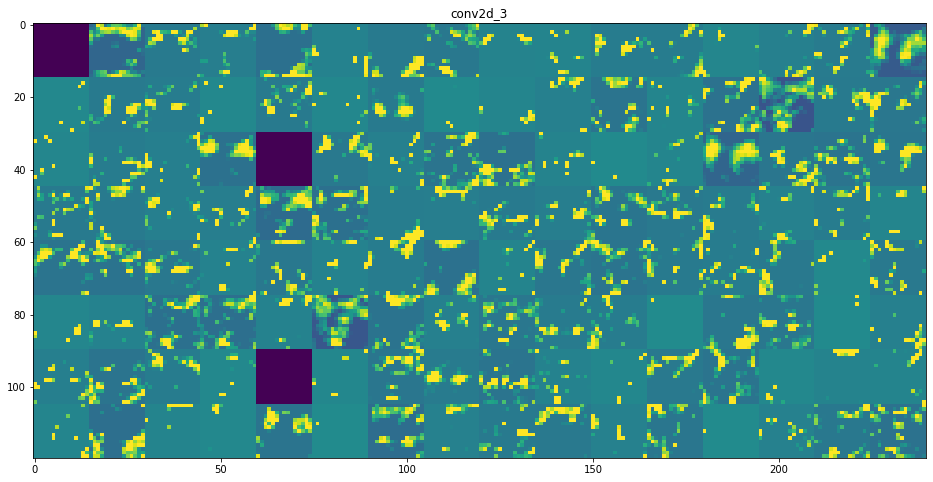

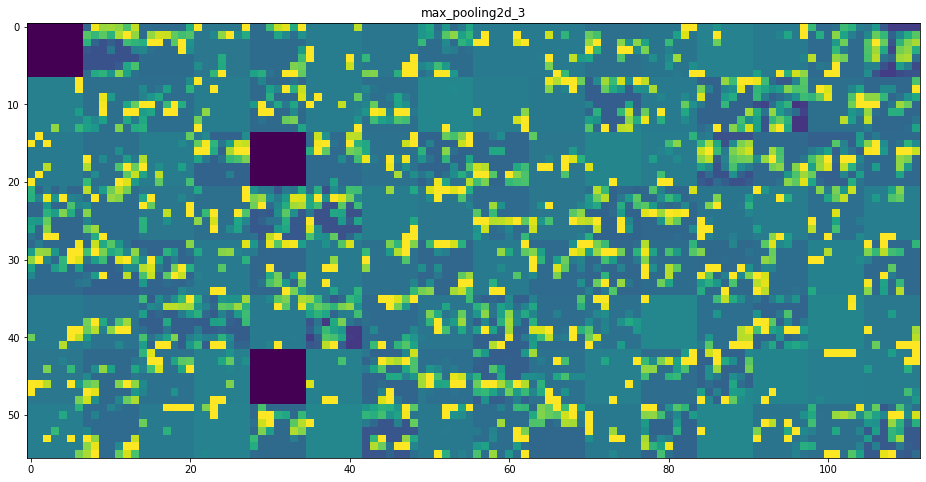

In [0]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row

  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row ]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image

  scale = 1. /size 
  plt.figure(figsize=(scale * display_grid.shape[1],
                    scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap = 'viridis')
  plt.show()